# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

Processing c:\users\analy\appdata\local\pip\cache\wheels\21\7f\02\420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3\gast-0.2.2-py3-none-any.whl
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


## Get Required Files from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
#Set your project path 
project_path = r'C:\Users\analy\Documents\AI_ML_Course\Bidirectional_LSTM\Sarcasm_Headlines_Dataset.json' ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [3]:
import numpy as np
import pandas as pd

In [25]:
data=pd.read_json(project_path,lines=True)

In [5]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
for i in range(len(data)):
    if 'onion' in data['article_link'][i][:30]:
        data['article_link'][i]=0
    else:
        data['article_link'][i]=1

C:\Users\analy\Softwares\Anaconda_Program_Files\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\analy\Softwares\Anaconda_Program_Files\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,0
1,0,dem rep. totally nails why congress is falling...,1
2,0,eat your veggies: 9 deliciously different recipes,1
3,1,inclement weather prevents liar from getting t...,0
4,1,mother comes pretty close to using word 'strea...,0


In [8]:
import seaborn as sns

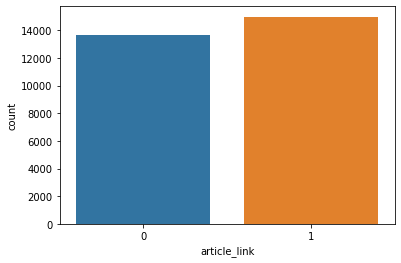

In [9]:
sns.countplot(data['article_link'])

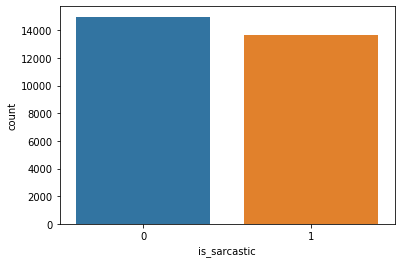

In [10]:
sns.countplot(data['is_sarcastic'])

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [26]:
data=data.drop('article_link',axis=1)
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [12]:
length=[]
for i in range(len(data)):
    length.append(len(data['headline'][i])) 

In [13]:
pd.Series(length).describe()

count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
dtype: float64

#**## Modelling**

## Import required modules required for modelling.

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [17]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [29]:
for i in range(len(length)):
    data['headline'][i]=data['headline'][i].lower()
    data['headline'][i]=re.sub('[^A-Za-z]',' ',data['headline'][i])
    data['headline'][i]=data['headline'][i].split()
    data['headline'][i]=[word for word in data['headline'][i] if not word in stopwords.words('english')]
    data['headline'][i]=[ps.stem(word) for word in data['headline'][i]]

C:\Users\analy\Softwares\Anaconda_Program_Files\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\analy\Softwares\Anaconda_Program_Files\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\analy\Softwares\Anaconda_Program_Files\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [30]:
data['headline']

0        [thirtysometh, scientist, unveil, doomsday, cl...
1        [dem, rep, total, nail, congress, fall, short,...
2                      [eat, veggi, delici, differ, recip]
3           [inclement, weather, prevent, liar, get, work]
4        [mother, come, pretti, close, use, word, strea...
                               ...                        
28614                [jew, celebr, rosh, hashasha, someth]
28615    [intern, affair, investig, disappoint, conspir...
28616    [beauti, accept, speech, week, came, queer, ko...
28617    [mar, probe, destroy, orbit, spielberg, gate, ...
28618                           [dad, clarifi, food, stop]
Name: headline, Length: 28619, dtype: object

In [31]:
lengths=[len(i) for i in data['headline']]

In [32]:
lengths

[7,
 10,
 5,
 6,
 8,
 2,
 5,
 11,
 9,
 4,
 6,
 7,
 5,
 11,
 7,
 9,
 8,
 4,
 4,
 9,
 6,
 9,
 1,
 5,
 7,
 8,
 5,
 5,
 9,
 6,
 4,
 3,
 4,
 10,
 8,
 5,
 12,
 7,
 13,
 6,
 5,
 10,
 6,
 8,
 9,
 6,
 6,
 7,
 9,
 7,
 9,
 6,
 8,
 3,
 12,
 7,
 8,
 5,
 10,
 6,
 11,
 4,
 3,
 9,
 7,
 11,
 6,
 7,
 9,
 9,
 4,
 6,
 8,
 7,
 12,
 10,
 5,
 3,
 3,
 9,
 10,
 10,
 10,
 8,
 8,
 8,
 5,
 9,
 8,
 10,
 8,
 6,
 3,
 9,
 6,
 6,
 14,
 6,
 8,
 5,
 8,
 6,
 7,
 9,
 5,
 13,
 7,
 6,
 8,
 6,
 5,
 10,
 6,
 5,
 8,
 8,
 4,
 10,
 9,
 5,
 7,
 3,
 9,
 4,
 8,
 9,
 9,
 7,
 9,
 7,
 11,
 4,
 7,
 10,
 7,
 14,
 7,
 9,
 9,
 6,
 7,
 7,
 7,
 8,
 12,
 9,
 9,
 8,
 6,
 7,
 4,
 9,
 6,
 10,
 8,
 8,
 8,
 10,
 5,
 5,
 6,
 5,
 8,
 8,
 8,
 6,
 4,
 8,
 5,
 6,
 5,
 10,
 1,
 5,
 5,
 3,
 7,
 8,
 7,
 9,
 4,
 6,
 12,
 15,
 8,
 7,
 12,
 4,
 13,
 4,
 5,
 9,
 9,
 3,
 9,
 12,
 7,
 8,
 12,
 11,
 6,
 6,
 7,
 10,
 7,
 5,
 8,
 7,
 8,
 4,
 10,
 8,
 6,
 11,
 6,
 7,
 6,
 3,
 4,
 3,
 7,
 8,
 5,
 9,
 7,
 4,
 11,
 6,
 7,
 3,
 5,
 7,
 8,
 9,
 5,
 8,
 7,
 15,
 5,
 8,


In [33]:
maxlength=max(lengths)
maxlength

107

In [34]:
data['headline'][79]

['first',
 'toronto',
 'film',
 'festiv',
 'jake',
 'gyllenha',
 'demolit',
 'stun',
 'lobster']

# Set Different Parameters for the model. ( 2 marks)

In [35]:
max_features = 10000
maxlen = maxlength## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [36]:
tk=Tokenizer(num_words=max_features)

In [37]:
tokens=tk.fit_on_texts(data['headline']) 

In [90]:
#sequences = tk.texts_to_sequences(data['headline'])

# Define X and y for your model.

In [38]:
X = tk.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  296  271 5029 1958  640 1076]
Number of Labels:  28619
1


In [54]:
X.shape

(28619, 107)

In [39]:
len(X[0])

107

In [40]:
X

array([[   0,    0,    0, ..., 1958,  640, 1076],
       [   0,    0,    0, ..., 1377, 1716,  778],
       [   0,    0,    0, ..., 1959,  384, 1154],
       ...,
       [   0,    0,    0, ..., 1140,  757, 1827],
       [   0,    0,    0, ..., 1511,  718, 4947],
       [   0,    0,    0, ..., 2469,  210,   96]])

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [47]:
vocab_size=len(tk.word_index)
vocab_size

17513

#**## Word Embedding**

## Get Glove Word Embeddings

In [42]:
project_path = r'C:\Users\analy\Documents\AI_ML_Course\Bidirectional_LSTM'

In [43]:
glove_file = project_path + "\glove.6B.zip"

In [44]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
    z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [45]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# Create a weight matrix for words in training docs

In [48]:
num_words=vocab_size
embedding_matrix =  np.zeros((num_words, 200))

for word, i in tk.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [50]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
n_timesteps = 10
embedding_size=200
# define LSTM
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         3502600   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dense (Dense)                (None, None, 100)         25700     
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           101       
Total params: 3,865,297
Trainable params: 3,865,297
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Final Bidirectional LSTM Model

In [64]:
input = Input(shape=(maxlen,))
model = Embedding(vocab_size,embedding_size,weights=[embedding_matrix],input_length=maxlen)(input)
model =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(model)
model = Dense(100,activation='relu')(model)
model = Flatten()(model)
model = Dense(100,activation='relu')(model)
output = Dense(1,activation='sigmoid')(model)
model = Model(input,output)

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 107)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 107, 200)          3502600   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 107, 200)          240800    
_________________________________________________________________
dense_5 (Dense)              (None, 107, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10700)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1070100   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total para

In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [79]:
batch_size = 100
epochs = 5

## Add your code here ##
model.fit(X,y,validation_split=0.2, batch_size=batch_size, epochs = epochs, verbose = 1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/5
22895/22895 [==============================] - 450s 20ms/sample - loss: 0.2810 - acc: 0.8840 - val_loss: 0.2477 - val_acc: 0.9071
Epoch 2/5
22895/22895 [==============================] - 473s 21ms/sample - loss: 0.2157 - acc: 0.9119 - val_loss: 0.2769 - val_acc: 0.8899
Epoch 3/5
22895/22895 [==============================] - 546s 24ms/sample - loss: 0.1704 - acc: 0.9303 - val_loss: 0.2985 - val_acc: 0.8859
Epoch 4/5
22895/22895 [==============================] - 660s 29ms/sample - loss: 0.1376 - acc: 0.9459 - val_loss: 0.3489 - val_acc: 0.8765
Epoch 5/5
22895/22895 [==============================] - 775s 34ms/sample - loss: 0.1109 - acc: 0.9571 - val_loss: 0.3836 - val_acc: 0.8730


### Considering train-test split

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [83]:
batch_size = 100
epochs = 5

## Add your code here ##
model.fit(X_train,y_train,validation_split=0.2, batch_size=batch_size, epochs = epochs, verbose = 1)

Train on 18316 samples, validate on 4579 samples
Epoch 1/5
18316/18316 [==============================] - 284s 16ms/sample - loss: 0.0388 - acc: 0.9847 - val_loss: 0.3558 - val_acc: 0.9133
Epoch 2/5
18316/18316 [==============================] - 262s 14ms/sample - loss: 0.0312 - acc: 0.9891 - val_loss: 0.3933 - val_acc: 0.9078
Epoch 3/5
18316/18316 [==============================] - 248s 14ms/sample - loss: 0.0277 - acc: 0.9897 - val_loss: 0.4310 - val_acc: 0.9072
Epoch 4/5
18316/18316 [==============================] - 248s 14ms/sample - loss: 0.0237 - acc: 0.9915 - val_loss: 0.4414 - val_acc: 0.9030
Epoch 5/5
18316/18316 [==============================] - 248s 14ms/sample - loss: 0.0218 - acc: 0.9914 - val_loss: 0.4834 - val_acc: 0.9050


In [88]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)

In [90]:
for i in range(len(y_test)):
    print('Expected:', y_test[i], 'Predicted', y_pred[i].round(0))

Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
E

Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [1.]
E

Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
E

Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
E

Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
E

Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
E

Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
E

Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
Expected: 0 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [0.]
Expected: 0 Predicted [0.]
Expected: 1 Predicted [1.]
Expected: 1 Predicted [1.]
E